In [90]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd
import sklearn
import networkx
import seaborn as sns
import seaborn as sb 
import statsmodels.api as sm 

# REPORT 7

#### Belén Herrada Ruiz - 20203026

### Lectura: “The Effects of Exposure to Better Neighborhoods on Children: New Evidence form the Moving to Opportunity Experiment” -  Chetty, Hendren, Katz

La investigación hecha por Chetty, Hendren, Katz titulada “The Effects of Exposure to Better Neighborhoods on Children: New Evidence form the Moving to Opportunity Experiment” analiza el experimento Moving to Opportunity (MTO) en los 90, el cual plantea evaluar los efectos causales de la movilidad de familias de bajos ingresos a mejor vecindarios. El efecto es medido a largo plazo específicamente a niños menores de 18 y 13 años, cuyas familias hayan participado del experimento y se hayan mudado según lo indicado. Todo esto bajo un marco de interés sobre las desigualdades entre los vecindarios y motivados por la reciente evidencia con respecto a que el tiempo en el que los individuos en ciertos espacios durante su infancias es clave para los resultados en el ya mencionado plazo.

Las fortalezas encontradas son, por un lado, la consideración de estudios previos acerca de efectos en otras áreas tales cómo la salud mental, salud física, el bienestar y la seguridad familiar en base a la mudanza a áreas de menor pobreza. Esto nos indica una consideración de lo ya analizado para tomar un enfoque integrado en relación al impacto del estudio. Otra fortaleza que se resalta dentro del estudio es la identificación de diferentes grupos que contribuirán al análisis.El primero, grupo experimental,  son quienes recibieron un vales de vivienda y pueden mudarse con una restricción de movilización a barrios con tasas de pobreza menores a 10%, luego, el grupo de la Sección 8, quienes recibieron un voucher, pero carecían de algún tipo de restricción para su reubicación; por último, el grupo de control, quienes no recibieron asistencia. Esta clara delimitación permite que se pueda realizar una comparación entre la aparición de los efectos que los autores buscan analizar al tener un grupo de control, lo cual enriquecese la investigación y la identificación de resultados. Una de las debilidades, por la misma metodología, presentada es la limitación del grupo estudiado, lo cual deja sin explorar el grado de los impactos en edades menores a las delimitadas en el experimento. Por otro lado, la contribución que se puede ubicar a partir de esta exploración es que sí existe un efecto causal, el cual reside en que al brindar asistencia para mudarse a vecindarios con menor pobreza sí tiene beneficios sustanciales para las familias. Además, el hallazgo hecho puede ser utilizado para la aplicación de políticas que tengan el objetivo de integrar a las familias desfavorecidas en comunidades de ingresos mixtos reduzcan la persistencia de la pobreza a lo largo de las generaciones. 

Por último, los próximos acercamientos a responder esta pregunta sería en una aplicación en diferentes regiones, tales como América Latina, la cual es caracterizada por la desigualdad de ingresos dentro de las mismas capitales de cada país. Esto ha sido abordado por Galvis-Aponte y  Meisel-Roca en “Persistencia de las desigualdades regionales en Colombia : un análisis espacial”, quienes identificaron el nivel de persistencia de pobreza tiene una relación con los efectos del vecindario; asimismo, introducen conceptos que integran su investigación cómo “trampas espaciales” al referirse a los vecindarios en malas condiciones. 

(2010) Galvis-Aponte, Luis Armando y Meisel-Roca, Adolfo. Banco de la República
https://repositorio.banrep.gov.co/handle/20.500.12134/3014


## Ejercicios

In [93]:
data = pd.read_csv('https://github.com/matheusfacure/python-causality-handbook/raw/master/causal-inference-for-the-brave-and-true/data/online_classroom.csv')
print(data.shape)
data.head()

(323, 10)


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


In [94]:
data_2 = (data
 .assign(class_format = np.select(
     [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face" #create a new variable
 ))) #group by the new variable (treatments)

data_2

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,face_to_face
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,face_to_face
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,blended
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,blended
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,online
...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,blended
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,online
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,online
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,online


In [95]:
df = pd.DataFrame(data_2)

print(df)

pd.get_dummies(df)

     gender  asian  black  hawaiian  hispanic  unknown  white  format_ol  \
0         0    0.0    0.0       0.0       0.0      0.0    1.0          0   
1         1    0.0    0.0       0.0       0.0      0.0    1.0          0   
2         1    0.0    0.0       0.0       0.0      0.0    1.0          0   
3         1    0.0    0.0       0.0       0.0      0.0    1.0          0   
4         1    0.0    0.0       0.0       0.0      0.0    1.0          1   
..      ...    ...    ...       ...       ...      ...    ...        ...   
318       0    0.0    0.0       0.0       0.0      0.0    1.0          0   
319       1    NaN    NaN       NaN       NaN      NaN    NaN          1   
320       0    NaN    NaN       NaN       NaN      NaN    NaN          1   
321       1    NaN    NaN       NaN       NaN      NaN    NaN          1   
322       1    0.0    0.0       0.0       0.0      0.0    1.0          0   

     format_blended  falsexam  class_format  
0               0.0  63.29997  face_to_fa

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended,class_format_face_to_face,class_format_online
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0,1,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0,1,0
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,1,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,1,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,1,0,0
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,0,0,1
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,0,0,1
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,0,0,1


In [96]:
data_3 = pd.get_dummies(data_2)
data_3

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended,class_format_face_to_face,class_format_online
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0,1,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0,1,0
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,1,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,1,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,1,0,0
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,0,0,1
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,0,0,1
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,0,0,1


## Histograma de las variables de formato de clase

Text(0.5, 1.0, 'Formato Hibrido')

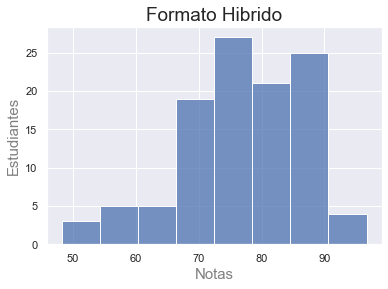

In [103]:
sns.histplot(data=data_3[data_3['class_format_blended']==1], x='falsexam')
plt.xlabel("Notas", fontsize=15, color = 'Grey')
plt.ylabel("Estudiantes", fontsize=15, color = 'Grey')
plt.title("Formato Hibrido", fontsize=19)



Text(0.5, 1.0, 'Formato presencial')

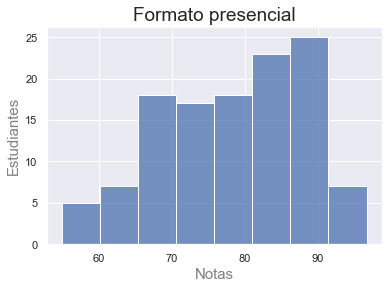

In [102]:
sns.histplot(data=data_3[data_3['class_format_face_to_face']==1], x='falsexam')
plt.xlabel("Notas", fontsize=15, color = 'Grey' )
plt.ylabel("Estudiantes", fontsize=15, color = 'Grey')
plt.title("Formato presencial", fontsize=19)


Text(0.5, 1.0, 'Formato Online')

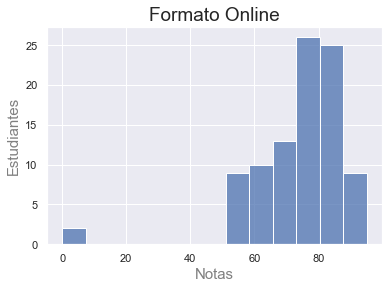

In [101]:
sns.histplot(data=data_3[data_3['class_format_online']==1], x='falsexam')
plt.xlabel("Notas", fontsize=15, color = 'Grey')
plt.ylabel("Estudiantes", fontsize=15, color = 'Grey')
plt.title("Formato Online", fontsize=19)

Los 3 histogramans indican una variación en la distribución de la frecuencia de las notas según el tipo de formato de clases. Een el caso de estudiantes pertenencientes al formato online tiene una distribución asimetrica hacia la derecha, con la identificación de un caso atipico, con rango de notas del 50 al 90. Mientras en el formato presencial hya una distribución de la frecuencia de notas más amplia en la que hay menos estudiantes con una nota menor a 60, pero mayor a 50; asimismoo, hay más estudiantes que tienen más altas notas y aparece el rango de notas mayores a 90. Por útlimo, en el formato hibrido hay una distribución más desigual, en las que destaca más frecuencias de notas altas.

## Promedios comparados: face-to-face y online lessons

In [75]:
data_promedio = pd.DataFrame(data_3, columns=['class_format_online', 'class_format_face_to_face', 'falsexam'])
data_promedio

,class_format_online,class_format_face_to_face,falsexam
0,0,1,63.29997
1,0,1,79.96000
2,0,0,83.37000
3,0,0,90.01994
4,1,0,83.30000
...,...,...,...
318,0,0,68.36000
319,1,0,70.05000
320,1,0,66.69000
321,1,0,83.29997


In [80]:
data_promedio01 = (data_promedio
 .assign(class_format_2 = np.select(
     [data_promedio["class_format_face_to_face"].astype(bool), data_promedio["class_format_online"].astype(bool)],
     ["face-to-face", "online"],
 )))
data_promedio01

,class_format_online,class_format_face_to_face,falsexam,class_format_2
0,0,1,63.29997,face-to-face
1,0,1,79.96000,face-to-face
2,0,0,83.37000,0
3,0,0,90.01994,0
4,1,0,83.30000,online
...,...,...,...,...
318,0,0,68.36000,0
319,1,0,70.05000,online
320,1,0,66.69000,online
321,1,0,83.29997,online


In [81]:
index = data_promedio01[(data_promedio01['class_format_2']=="0")].index
data_promedio02=data_promedio01.drop(index)
data_promedio02

,class_format_online,class_format_face_to_face,falsexam,class_format_2
0,0,1,63.29997,face-to-face
1,0,1,79.96000,face-to-face
4,1,0,83.30000,online
5,1,0,88.34996,online
7,0,1,90.00000,face-to-face
...,...,...,...,...
316,0,1,91.65000,face-to-face
317,0,1,84.99000,face-to-face
319,1,0,70.05000,online
320,1,0,66.69000,online


In [83]:
data_promedio02.groupby('class_format_online').mean()

,class_format_face_to_face,falsexam
class_format_online,,
0,1.0,78.547485
1,0.0,73.635263


In [85]:
#Tomando los valores de los promedios de cada tipo de formato de clase: 

# Y(1)- Y(0) = ATE Average Treatment Effect - Causal 
# Y(1) -> online, Y(0) -> face_to_face

73.635263- 78.547485 

-4.912222

 Se puede ver que el formato de clase online tiene un promedio dentro de sus estuadiante en el examen de 73.63, mientras que en el formato de frente a frente tiene un promedio de 78.54. Esto evidencia una diferencia de - 4.91. A su vez, nos dice que los estudiantes online tienden a tener un promedio inferior en 5 puntos a comparación de las clases presenciales, indicando que hay una efecto causal negativo en relación de el redimiento de los estudiantes y los estudios virtuales

## Regresión 


In [86]:
data_4 = (data_promedio02
 .assign(data_promedio01 = np.select(
     [data_promedio02["class_format_face_to_face"].astype(bool), data_promedio02["class_format_online"].astype(bool)],
     ["0", "1"]
 )))
data_4

,class_format_online,class_format_face_to_face,falsexam,class_format_2,data_promedio01
0,0,1,63.29997,face-to-face,0
1,0,1,79.96000,face-to-face,0
4,1,0,83.30000,online,1
5,1,0,88.34996,online,1
7,0,1,90.00000,face-to-face,0
...,...,...,...,...,...
316,0,1,91.65000,face-to-face,0
317,0,1,84.99000,face-to-face,0
319,1,0,70.05000,online,1
320,1,0,66.69000,online,1


In [87]:
pd.get_dummies(data_4)

,class_format_online,class_format_face_to_face,falsexam,class_format_2_face-to-face,class_format_2_online,data_promedio01_0,data_promedio01_1
0,0,1,63.29997,1,0,1,0
1,0,1,79.96000,1,0,1,0
4,1,0,83.30000,0,1,0,1
5,1,0,88.34996,0,1,0,1
7,0,1,90.00000,1,0,1,0
...,...,...,...,...,...,...,...
316,0,1,91.65000,1,0,1,0
317,0,1,84.99000,1,0,1,0
319,1,0,70.05000,0,1,0,1
320,1,0,66.69000,0,1,0,1


In [92]:
ols_reg = sm.OLS.from_formula("falsexam ~ class_format_2", 
              data = data_promedio02).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               falsexam   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     8.554
Date:                Tue, 08 Nov 2022   Prob (F-statistic):            0.00382
Time:                        11:12:32   Log-Likelihood:                -837.85
No. Observations:                 214   AIC:                             1680.
Df Residuals:                     212   BIC:                             1686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   78.5475      1.113     70.563      0.000      76.353      80.742
class_format_2[T.online]    -4.9122      1.680     -2.925      0.004      -8.223      -1.601
==============================================================================
Omnibus:                      129.000   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1179.385
Skew:                          -2.179   Prob(JB):                    7.94e-257
Kurtosis:                      13.643   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

La regresión nos indica en el coeficiente que el aumento en uno de las clases online significa una disminución de 4.91 en el logaritmo del del promedio en los estudiantes. 